## Dataset: IMDB review

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, _test_labels) = imdb.load_data(num_words=10_000)

17465344/17464789 [==============================] - 2s 0us/step


## Input data

Each sample is a sequence of integers, each integer encodes a single word.

In [9]:
train_data[100][:10]  # only print the first few

[1, 13, 244, 6, 87, 337, 7, 628, 2219, 5]

In [21]:
def to_text(sample, max_words=50):
    word_index = imdb.get_word_index()
    reverse_index = {value: key for key, value in word_index.items()}
    return " ".join([reverse_index[num] for num in sample[:max_words]])

to_text(train_data[100])

"the was rather is him completely br english send to one dvd for kind way are year type but tired talent of am stories slightest coop on her no was although some has as was garbage che's that to to when it as if is herself br and door simply"

Labels define the sentiment of the review. Reviews ar either negative (=0) or positive(=1). This is the task we will teach our network: For an given sequence of words (=a IMDB review), infer the sentiment encoded as a number.

In [27]:
train_labels[:10]  # sentiment labels of first 10 samples

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

## Turn input sequences into vectors

Neural nets require numerical input of fixed length. We transform our input samples (variable sized list of word) into one-hot vectors over a fixed vocabulary.

In [13]:
import numpy as np

In [15]:
def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Model Definition

As a first (simple) model to process sequences, we'll create Multilayer Perceptron with 2 hidden layers (16 units each, ReLU activation) and an output layer that maps the input to the range from 0 (=negative review) to 1 (=positive review).

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10_000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Model training

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [47]:
# Train/validation split
split_idx = int(0.1 * len(x_train))  # take 10% of training data for validation
x_validation = x_train[:split_idx]
x_partial_train = x_train[split_idx:]
y_validation = train_labels[:split_idx]
y_partial_train = train_labels[split_idx:]

In [48]:
history = model.fit(x=x_partial_train, 
                    y=y_partial_train,
                    validation_data=(x_validation, y_validation),
                    epochs=10)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 2s 102us/sample - loss: 0.0989 - binary_accuracy: 0.9650 - val_loss: 0.0861 - val_binary_accuracy: 0.9692
Epoch 2/10
22500/22500 [==============================] - 2s 99us/sample - loss: 0.0302 - binary_accuracy: 0.9897 - val_loss: 0.0954 - val_binary_accuracy: 0.9680
Epoch 3/10
22500/22500 [==============================] - 2s 101us/sample - loss: 0.0130 - binary_accuracy: 0.9965 - val_loss: 0.0997 - val_binary_accuracy: 0.9680
Epoch 4/10
22500/22500 [==============================] - 2s 100us/sample - loss: 0.0034 - binary_accuracy: 0.9996 - val_loss: 0.1198 - val_binary_accuracy: 0.9624
Epoch 5/10
22500/22500 [==============================] - 2s 106us/sample - loss: 8.3270e-04 - binary_accuracy: 1.0000 - val_loss: 0.1352 - val_binary_accuracy: 0.9644
Epoch 6/10
22500/22500 [==============================] - 2s 100us/sample - loss: 3.3106e-04 - binary_accuracy: 1.0000 - val_los

In [56]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

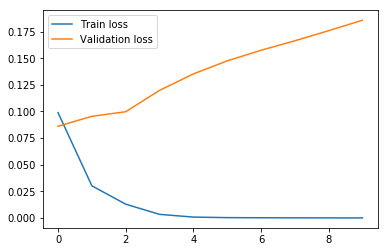

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.show()

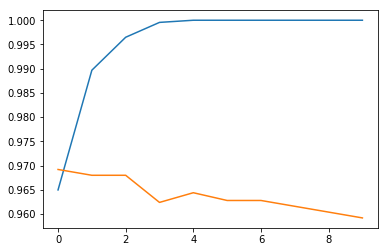

In [53]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.show()